In [1]:
import yt
import trident
from yt import derived_field

import numpy as np 
from scipy import stats


from astropy.table import Table
import astropy.units as u

import os
os.sys.path.insert(0, '/Users/molly/Dropbox/foggie/foggie')
from consistency import *
from get_halo_center import get_halo_center
from get_proper_box_size import get_proper_box_size
from modular_plots import get_refine_box

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
import matplotlib.pyplot as plt


%matplotlib notebook

/Users/molly/anaconda2/envs/astroconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/molly/Dropbox/foggie/foggie/consistency.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/molly/anaconda2/envs/astroconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/molly/anaconda2/envs/astroconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/moll

In [2]:
width = default_width
track_name = "/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track"
#track_name = "/astro/simulations/FOGGIE/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track"
track = Table.read(track_name, format='ascii')
track.sort('col1')


In [3]:
dsr = yt.load("/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/RD0020/RD0020")
trident.add_ion_fields(dsr, ions=['C IV', 'O VI','Si II', 'C II', 'Si III'])

zsnap = dsr.current_redshift
proper_box_size = get_proper_box_size(dsr)

refine_box, refine_box_center, refine_width = get_refine_box(dsr, zsnap, track)
refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
centerr, velocity = get_halo_center(dsr, refine_box_center)
width_code = width / proper_box_size ## needs to be in code units
boxr = dsr.r[centerr[0] - 0.5*width_code : centerr[0] + 0.5*width_code, \
           centerr[1] - 0.5*width_code : centerr[1] + 0.5*width_code, \
           centerr[2] - 0.5*width_code : centerr[2] + 0.5*width_code]
sphr = dsr.sphere(centerr, (0.45*refine_width, 'kpc'))
tenkpc_sphr = dsr.sphere(centerr, (10,'kpc'))


## natural
dsn = yt.load("/Users/molly/foggie/halo_008508/nref11n/natural/RD0020/RD0020")
trident.add_ion_fields(dsn, ions=['C IV', 'O VI', 'Si II', 'C II', 'Si III'])

refine_boxn, refine_box_centern, refine_width_code = get_refine_box(dsn, zsnap, track)
refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
centern, velocity = get_halo_center(dsn, refine_box_centern)
width_code = width / proper_box_size ## needs to be in code units
boxn = dsn.r[centern[0] - 0.5*width_code : centern[0] + 0.5*width_code, \
           centern[1] - 0.5*width_code : centern[1] + 0.5*width_code, \
           centern[2] - 0.5*width_code : centern[2] + 0.5*width_code]
sphn = dsn.sphere(centern, (0.45*refine_width, 'kpc'))
tenkpc_sphn = dsn.sphere(centern, (10,'kpc'))


yt : [INFO     ] 2018-05-07 11:19:30,708 Parameters: current_time              = 154.801032717
yt : [INFO     ] 2018-05-07 11:19:30,709 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-05-07 11:19:30,711 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-05-07 11:19:30,712 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-05-07 11:19:30,714 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-05-07 11:19:30,716 Parameters: current_redshift          = 1.99999968795
yt : [INFO     ] 2018-05-07 11:19:30,717 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-05-07 11:19:30,719 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-05-07 11:19:30,720 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 4574/4574 [00:00<00:00, 16185.93it/s]
yt : [INFO     ] 2018-05-07 11:19:31,251 Gathering a field list (this may take a moment.)


('using this loc:', <Table length=1>
   col1     col2     col3     col4     col5     col6     col7    col8
 float64  float64  float64  float64  float64  float64  float64  int64
--------- -------- -------- -------- -------- -------- -------- -----
2.0499999 0.493091 0.488119 0.501099 0.495091 0.490119 0.503099    10)
We have located the main halo at : [0.4940309524536133, 0.48897266387939453, 0.5021486282348633]


yt : [INFO     ] 2018-05-07 11:20:09,212 Parameters: current_time              = 154.801187733
yt : [INFO     ] 2018-05-07 11:20:09,214 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-05-07 11:20:09,216 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-05-07 11:20:09,217 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-05-07 11:20:09,219 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-05-07 11:20:09,220 Parameters: current_redshift          = 1.99999762534
yt : [INFO     ] 2018-05-07 11:20:09,222 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-05-07 11:20:09,223 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-05-07 11:20:09,225 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 1449/1449 [00:00<00:00, 27490.51it/s]
yt : [INFO     ] 2018-05-07 11:20:09,358 Gathering a field list (this may take a moment.)


('using this loc:', <Table length=1>
   col1     col2     col3     col4     col5     col6     col7    col8
 float64  float64  float64  float64  float64  float64  float64  int64
--------- -------- -------- -------- -------- -------- -------- -----
2.0499999 0.493091 0.488119 0.501099 0.495091 0.490119 0.503099    10)
We have located the main halo at : [0.4940328598022461, 0.4889516830444336, 0.5021543502807617]


In [ ]:
for field in dsn.derived_field_list:
    if field[0] == 'stars':
        print (field)


In [ ]:
fig = plt.figure()
angmomn = tenkpc_sphn['stars', 'particle_angular_momentum_magnitude']
massn = tenkpc_sphn['stars', 'particle_mass']
histn = plt.hist(angmomn.value, normed=True, bins=400, alpha=0.3, color='blue', weights=massn, label="natural")

angmomr = tenkpc_sphr['stars', 'particle_angular_momentum_magnitude']
massr = tenkpc_sphr['stars', 'particle_mass']
histr = plt.hist(angmomr.value, normed=True, bins=400, alpha=0.3, color='green', weights=massr, label="nref11n_nref10f")
plt.xlim(0,1e67)
plt.legend()
plt.title('angular momentum in stars')

In [ ]:

plt.xlim(0,1e67)
plt.legend()
plt.title('angular momentum in stars')

In [ ]:
fig = plt.figure()
angmomn = sphn['gas', 'angular_momentum_magnitude']
massn = sphn['gas', 'cell_mass']
histn = plt.hist(angmomn.value, normed=True, bins=400, alpha=0.3, color='blue', weights=massn, label="natural")

angmomr = sphr['gas', 'angular_momentum_magnitude']
massr = sphr['gas', 'cell_mass']
histr = plt.hist(angmomr.value, normed=True, bins=400, alpha=0.3, color='green', weights=massr, label="nref11n_nref10f")
plt.legend()
plt.title('angular momentum in gas')

In [ ]:
plt.xlim(0.0,1e69)
plt.ylim(0,0.2e-68)

In [ ]:
### really want mass-weighted angular momentum versus radius .....
plt.figure()



In [ ]:

# Compute the bulk velocity from the cells in this sphere
bulk_vel = sphn.quantities.bulk_velocity()


# Get the second sphere
#sp1 = ds.sphere(ds.domain_center, (500., "kpc"))

# Set the bulk velocity field parameter
sphn.set_field_parameter("bulk_velocity", bulk_vel)

# Radial profile without correction

rp0 = yt.create_profile(sphn, 'radius', 'radial_velocity',
                        units = {'radius': 'kpc'},
                        logs = {'radius': False})

# Radial profile with correction for bulk velocity

#rp1 = yt.create_profile(sp1, 'radius', 'radial_velocity',
#                        units = {'radius': 'kpc'},
#                        logs = {'radius': False})

# Make a plot using matplotlib

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(rp0.x.value, rp0["radial_velocity"].in_units("km/s").value)
#        rp1.x.value, rp1["radial_velocity"].in_units("km/s").value)

ax.set_xlabel(r"$\mathrm{r\ (kpc)}$")
ax.set_ylabel(r"$\mathrm{v_r\ (km/s)}$")
#ax.legend(["Without Correction", "With Correction"])

#fig.savefig("%s_profiles.png" % ds)

In [ ]:
sphn.quantities.angular_momentum_vector()


In [ ]:
def radius(data):
    return np.sqrt((data.center[0]-data['x'])**2.+(data.center[1]-data['y'])**2.+(data.center[2]-data['z'])**2.).in_units('kpc')

all_radius = radius(tenkpc_sphn) 

In [ ]:
#print min(all_radius)
gt_five_sphn = sphn.cut_region(["obj['temperature'] > 1e6"])
print gt_five_sphn

In [ ]:
## there is a better way to do this
p = yt.ProjectionPlot(dsn, 'x', 'density', center=center, data_source=gt_five_sphn, width=(refine_width, 'kpc'))
p.show()

In [ ]:

trythis = sphn - tenkpc_sphn

p = yt.ProjectionPlot(dsn, 'x', 'density', center=centern, data_source=trythis, width=(refine_width, 'kpc'))
p.show()

In [ ]:

p = yt.ProjectionPlot(dsn, 'x', 'density', center=centern, data_source=tenkpc_sphn, width=(refine_width, 'kpc'))
p.show()

In [ ]:
trythis[('gas', 'specific_angular_momentum_x')].mean(), trythis[('gas', 'angular_momentum_x')].sum()



In [4]:
data = Table(names=('redshift','radius', 'nref_mode', \
                    'net_mass_flux', 'net_metal_flux', \
                    'mass_flux_in', 'mass_flux_out', \
                    'metal_flux_in', 'metal_flux_out', \
                    'net_cold_mass_flux', 'cold_mass_flux_in', 'cold_mass_flux_out', \
                    'net_cool_mass_flux', 'cool_mass_flux_in', 'cool_mass_flux_out', \
                    'net_warm_mass_flux', 'warm_mass_flux_in', 'warm_mass_flux_out', \
                    'net_hot_mass_flux', 'hot_mass_flux_in', 'hot_mass_flux_out', \
                    'annular_ang_mom_gas_x', 'annular_ang_mom_gas_y','annular_ang_mom_gas_z', \
                    'annular_spec_ang_mom_gas_x', 'annular_spec_ang_mom_gas_y','annular_spec_ang_mom_gas_z',\
                    'annular_ang_mom_dm_x', 'annular_ang_mom_dm_y','annular_ang_mom_dm_z', \
                    'annular_spec_ang_mom_dm_x', 'annular_spec_ang_mom_dm_y', 'annular_spec_ang_mom_dm_z', \
                    'outside_ang_mom_gas_x', 'outside_ang_mom_gas_y', 'outside_ang_mom_gas_z',  \
                    'outside_spec_ang_mom_gas_x', 'outside_spec_ang_mom_gas_y', 'outside_spec_ang_mom_gas_z', \
                    'outside_ang_mom_dm_x', 'outside_ang_mom_dm_y','outside_ang_mom_dm_z',\
                    'outside_spec_ang_mom_dm_x', 'outside_spec_ang_mom_dm_y', 'outside_spec_ang_mom_dm_z', \
                    'inside_ang_mom_stars_x', 'inside_ang_mom_stars_y', 'inside_ang_mom_stars_z', \
                    'inside_spec_ang_mom_stars_x', 'inside_spec_ang_mom_stars_y', 'inside_spec_ang_mom_stars_z'),
      dtype=('f8', 'f8', 'i8',
             'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
             'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
             'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
             'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
             'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
             'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
             'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
             'f8', 'f8', 'f8', 'f8', 'f8', 'f8'
            ))



In [ ]:
ds = dsn
ds.add_particle_filter('stars')
ds.add_particle_filter('dm')
for field in ds.derived_field_list:
    if field[0] == 'dm':
        print (field)
#ds.derived_field_list

In [6]:
halo_center = centern
refine_boxn, refine_box_centern, refine_width_code = get_refine_box(dsn, zsnap, track)
refine_boxn['all', 'particle_type']

('using this loc:', <Table length=1>
   col1     col2     col3     col4     col5     col6     col7    col8
 float64  float64  float64  float64  float64  float64  float64  int64
--------- -------- -------- -------- -------- -------- -------- -----
2.0499999 0.493091 0.488119 0.501099 0.495091 0.490119 0.503099    10)


YTArray([4., 4., 4., ..., 4., 4., 4.]) (dimensionless)

In [8]:
halo_center = centern
radii = refine_width_code*0.5*np.arange(0.9, 0.1, -0.2)  # 0.5 because radius
small_sphere = dsn.sphere(halo_center, 0.05*refine_width_code) # R=10ckpc/h
big_sphere = dsn.sphere(halo_center, 0.45*refine_width_code)
bleh = dsn.sphere(halo_center, 0.3*refine_width_code)
this_annulus = big_sphere - bleh
print(radii)

[0.0009 0.0007 0.0005 0.0003]


In [ ]:
for radius in radii:
    this_sphere = ds.sphere(halo_center, radius)
    if radius != np.max(radii):
        # set up the shapes
        surface = ds.surface(big_sphere, 'radius', (radius, 'code_length'))
        # annuli
        big_annulus = big_sphere - this_sphere
        # note that refine_fracs is in decreasing order!
        this_annulus = last_sphere - this_sphere
        print(big_sphere.radius, last_sphere.radius, this_sphere.radius)
        inside_sphere = ds.sphere(halo_center, radius)

        
        nref_mode = stats.mode(surface[('index', 'grid_level')])
        mass_flux = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "density")
        metal_flux = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "metal_density")
        ## also want to filter based on radial velocity to get fluxes in and mass flux out

        ## and want to filter based on temperature

        
        ## ok want angular momenta of stars
        inside_ang_mom_stars_x = inside_sphere['stars', 'particle_angular_momentum_x'].sum()
        inside_ang_mom_stars_y = inside_sphere['stars', 'particle_angular_momentum_y'].sum()
        inside_ang_mom_stars_z = inside_sphere['stars', 'particle_angular_momentum_z'].sum()
        inside_spec_ang_mom_stars_x = inside_sphere['stars', 'particle_specific_angular_momentum_x'].mean()
        inside_spec_ang_mom_stars_y = inside_sphere['stars', 'particle_specific_angular_momentum_y'].mean()
        inside_spec_ang_mom_stars_z = inside_sphere['stars', 'particle_specific_angular_momentum_z'].mean()

        ## and of gas
        annular_ang_mom_gas_x = this_annulus[('gas', 'angular_momentum_x')].sum()
        annular_ang_mom_gas_y = this_annulus[('gas', 'angular_momentum_y')].sum()
        annular_ang_mom_gas_z = this_annulus[('gas', 'angular_momentum_z')].sum()
        annular_spec_ang_mom_gas_x = this_annulus[('gas', 'specific_angular_momentum_x')].mean()
        annular_spec_ang_mom_gas_y = this_annulus[('gas', 'specific_angular_momentum_y')].mean()
        annular_spec_ang_mom_gas_z = this_annulus[('gas', 'specific_angular_momentum_z')].mean()

        outside_ang_mom_gas_x = big_annulus[('gas', 'angular_momentum_x')].sum()
        outside_ang_mom_gas_y = big_annulus[('gas', 'angular_momentum_y')].sum()
        outside_ang_mom_gas_z = big_annulus[('gas', 'angular_momentum_z')].sum()
        outside_spec_ang_mom_gas_x = big_annulus[('gas', 'specific_angular_momentum_x')].mean()
        outside_spec_ang_mom_gas_y = big_annulus[('gas', 'specific_angular_momentum_y')].mean()
        outside_spec_ang_mom_gas_z = big_annulus[('gas', 'specific_angular_momentum_z')].mean()
   
        ## and of dark matter
        outside_ang_mom_dm_x = big_annulus[('dm', 'particle_angular_momentum_x')].sum()
        outside_ang_mom_dm_y = big_annulus[('dm', 'particle_angular_momentum_y')].sum()
        outside_ang_mom_dm_z = big_annulus[('dm', 'particle_angular_momentum_z')].sum()
        outside_spec_ang_mom_dm_x = big_annulus[('dm', 'particle_specific_angular_momentum_x')].mean()
        outside_spec_ang_mom_dm_y = big_annulus[('dm', 'particle_specific_angular_momentum_y')].mean()
        outside_spec_ang_mom_dm_z = big_annulus[('dm', 'particle_specific_angular_momentum_z')].mean()

    last_sphere = this_sphere


In [ ]:
ds = dsn
ds.add_field(('gas_density_out'), function=_gas_density_in, units="Msun/kpc**3", force_override=True)
s = yt.SlicePlot(ds, 'x', 'density', center=centern, data_source=this_annulus, width=(refine_width, 'kpc'))
s.annotate_quiver('velocity_y', 'velocity_z', 16)
s.show()

In [ ]:
hot_gas = this_annulus['temperature']
low_values_flags = this_annulus['temperature'] < 1.e6  # Where values are low
hot_gas[low_values_flags] = 0  # All low values set to 0
print(np.where(hot_gas > 1.e6))

In [9]:
####################    PARTICLES          ######################################
@yt.particle_filter(requires=["particle_type"], filtered_type='all')
def stars(pfilter, data):
    filter = data[(pfilter.filtered_type, "particle_type")] == 2
    return filter

## these are the must refine particles; no dm particle type 0's should be there!
@yt.particle_filter(requires=["particle_type"], filtered_type='all')
def dm(pfilter, data):
    filter = data[(pfilter.filtered_type, "particle_type")] == 4
    return filter

#-----------------------------------------------------------------------------------------------------
####################    FLUXES          ######################################
@derived_field(name="gas_density_in", units="Msun/kpc**3", force_override=True)
def _gas_density_in(field, data):
    gas_density_in = data['density']
    values_flags = data['radial_velocity'] > 0.  ## positive radial velocity = gas going out
    gas_density_in[values_flags] = 0
    return gas_density_in

@derived_field(name="gas_density_out", units="Msun/kpc**3", force_override=True)
def _gas_density_out(field, data):
    gas_density_out = data['density']
    values_flags = data['radial_velocity'] < 0.  ## positive radial velocity = gas going out
    gas_density_out[values_flags] = 0
    return gas_density_out

@derived_field(name="metal_density_in", units="Msun/kpc**3", force_override=True)
def _metal_density_in(field, data):
    metal_density_in = data['metal_density']
    values_flags = data['radial_velocity'] > 0.  ## positive radial velocity = metal going out
    metal_density_in[values_flags] = 0
    return metal_density_in

@derived_field(name="metal_density_out", units="Msun/kpc**3", force_override=True)
def _metal_density_out(field, data):
    metal_density_out = data['metal_density']
    values_flags = data['radial_velocity'] < 0.  ## positive radial velocity = metal going out
    metal_density_out[values_flags] = 0
    return metal_density_out

@derived_field(name="hot_gas_density", units="Msun/kpc**3", force_override=True)
def _hot_gas_density(field, data):
    gas_density = data['density']
    values_flags = (data['temperature'].in_units('K') < 1.e6)
    gas_density[values_flags] = 0
    return gas_density

@derived_field(name="hot_gas_density_in", units="Msun/kpc**3", force_override=True)
def _hot_gas_density_in(field, data):
    gas_density_in = data['density']
    values_flags = (data['radial_velocity'] > 0.) | (data['temperature'].in_units('K') < 1.e6)
    gas_density_in[values_flags] = 0
    return gas_density_in

@derived_field(name="hot_gas_density_out", units="Msun/kpc**3", force_override=True)
def _hot_gas_density_out(field, data):
    gas_density_out = data['density']
    values_flags = (data['radial_velocity'] < 0.) | (data['temperature'].in_units('K') < 1.e6)
    gas_density_out[values_flags] = 0
    return gas_density_out

@derived_field(name="warm_gas_density", units="Msun/kpc**3", force_override=True)
def _warm_gas_density(field, data):
    gas_density = data['density']
    values_flags =(data['temperature'].in_units('K') < 1.e5) | (data['temperature'].in_units('K') >= 1.e6)
    gas_density[values_flags] = 0
    return gas_density

@derived_field(name="warm_gas_density_in", units="Msun/kpc**3", force_override=True)
def _warm_gas_density_in(field, data):
    gas_density_in = data['density']
    values_flags = (data['radial_velocity'] > 0.) | (data['temperature'].in_units('K') < 1.e5) | (data['temperature'].in_units('K') >= 1.e6)
    gas_density_in[values_flags] = 0
    return gas_density_in

@derived_field(name="warm_gas_density_out", units="Msun/kpc**3", force_override=True)
def _warm_gas_density_out(field, data):
    gas_density_out = data['density']
    values_flags = (data['radial_velocity'] < 0.) | (data['temperature'].in_units('K') < 1.e5) | (data['temperature'].in_units('K') >= 1.e6)
    gas_density_out[values_flags] = 0
    return gas_density_out

@derived_field(name="cool_gas_density", units="Msun/kpc**3", force_override=True)
def _cool_gas_density(field, data):
    gas_density = data['density']
    values_flags = (data['temperature'].in_units('K') < 1.e4) | (data['temperature'].in_units('K') >= 1.e5)
    gas_density[values_flags] = 0
    return gas_density

@derived_field(name="cool_gas_density_in", units="Msun/kpc**3", force_override=True)
def _cool_gas_density_in(field, data):
    gas_density_in = data['density']
    values_flags = (data['radial_velocity'] > 0.) | (data['temperature'].in_units('K') < 1.e4) | (data['temperature'].in_units('K') >= 1.e5)
    gas_density_in[values_flags] = 0
    return gas_density_in

@derived_field(name="cool_gas_density_out", units="Msun/kpc**3", force_override=True)
def _cool_gas_density_out(field, data):
    gas_density_out = data['density']
    values_flags = (data['radial_velocity'] < 0.) | (data['temperature'].in_units('K') < 1.e4) | (data['temperature'].in_units('K') >= 1.e5)
    gas_density_out[values_flags] = 0
    return gas_density_out

@derived_field(name="cold_gas_density", units="Msun/kpc**3", force_override=True)
def _cold_gas_density(field, data):
    gas_density = data['density']
    values_flags = (data['temperature'].in_units('K') >= 1.e4)
    gas_density[values_flags] = 0
    return gas_density

@derived_field(name="cold_gas_density_in", units="Msun/kpc**3", force_override=True)
def _cold_gas_density_in(field, data):
    gas_density_in = data['density']
    values_flags = (data['radial_velocity'] > 0.) | (data['temperature'].in_units('K') >= 1.e4)
    gas_density_in[values_flags] = 0
    return gas_density_in

@derived_field(name="cold_gas_density_out", units="Msun/kpc**3", force_override=True)
def _cold_gas_density_out(field, data):
    gas_density_out = data['density']
    values_flags = (data['radial_velocity'] < 0.) | (data['temperature'].in_units('K') >= 1.e4)
    gas_density_out[values_flags] = 0
    return gas_density_out



/Users/molly/anaconda2/envs/astroconda/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


In [10]:
ds = dsn
ds.add_particle_filter('stars')
ds.add_particle_filter('dm')
ds.add_field(('gas_density_in'), function=_gas_density_in, units="Msun/kpc**3", force_override=True)
ds.add_field(('gas_density_out'), function=_gas_density_out, units="Msun/kpc**3", force_override=True)
ds.add_field(('metal_density_in'), function=_metal_density_in, units="Msun/kpc**3", force_override=True)
ds.add_field(('metal_density_out'), function=_metal_density_out, units="Msun/kpc**3", force_override=True)
ds.add_field(('hot_gas_density'), function=_hot_gas_density, units="Msun/kpc**3", force_override=True)
ds.add_field(('hot_gas_density_in'), function=_hot_gas_density_in, units="Msun/kpc**3", force_override=True)
ds.add_field(('hot_gas_density_out'), function=_hot_gas_density_out, units="Msun/kpc**3", force_override=True)
ds.add_field(('warm_gas_density'), function=_warm_gas_density, units="Msun/kpc**3", force_override=True)
ds.add_field(('warm_gas_density_in'), function=_warm_gas_density_in, units="Msun/kpc**3", force_override=True)
ds.add_field(('warm_gas_density_out'), function=_warm_gas_density_out, units="Msun/kpc**3", force_override=True)
ds.add_field(('cool_gas_density'), function=_cool_gas_density, units="Msun/kpc**3", force_override=True)
ds.add_field(('cool_gas_density_in'), function=_cool_gas_density_in, units="Msun/kpc**3", force_override=True)
ds.add_field(('cool_gas_density_out'), function=_cool_gas_density_out, units="Msun/kpc**3", force_override=True)
ds.add_field(('cold_gas_density'), function=_cold_gas_density, units="Msun/kpc**3", force_override=True)
ds.add_field(('cold_gas_density_in'), function=_cold_gas_density_in, units="Msun/kpc**3", force_override=True)
ds.add_field(('cold_gas_density_out'), function=_cold_gas_density_out, units="Msun/kpc**3", force_override=True)


/Users/molly/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  after removing the cwd from sys.path.
/Users/molly/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  """
/Users/molly/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  
/Users/molly/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  import sys
/Users/molly/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  
/Users/molly/anaconda2/en

yt : [INFO     ] 2018-05-07 11:37:55,197 Projection completed
yt : [INFO     ] 2018-05-07 11:37:55,199 xlim = 0.487952 0.489952
yt : [INFO     ] 2018-05-07 11:37:55,200 ylim = 0.501154 0.503154
yt : [INFO     ] 2018-05-07 11:37:55,203 xlim = 0.487952 0.489952
yt : [INFO     ] 2018-05-07 11:37:55,205 ylim = 0.501154 0.503154
yt : [INFO     ] 2018-05-07 11:37:55,207 Making a fixed resolution buffer of (('gas', 'hot_gas_density_out')) 800 by 800
yt : [INFO     ] 2018-05-07 11:37:55,819 Projection completed
yt : [INFO     ] 2018-05-07 11:37:55,933 Projection completed



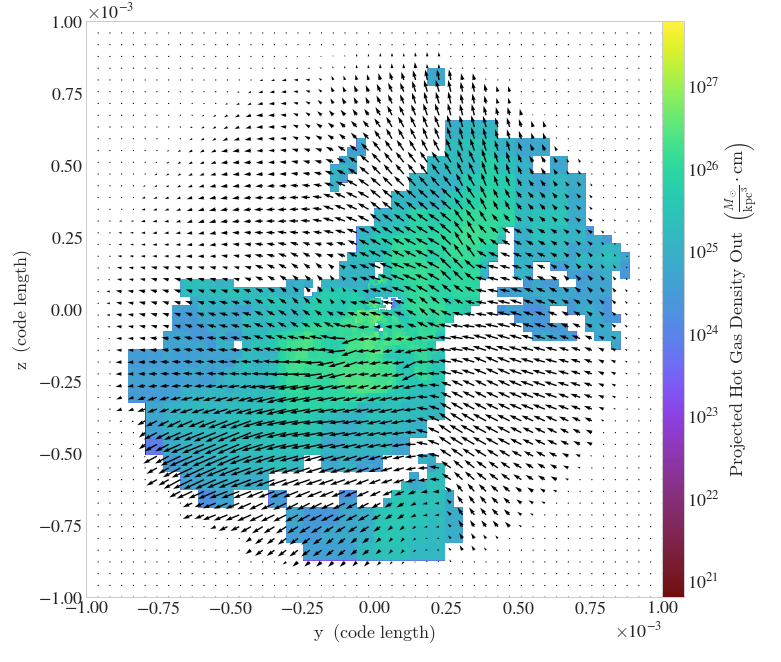

In [26]:
# ds = dsn
# ds.add_field(('metal_density_out'), function=_metal_density_out, units="Msun/kpc**3", force_override=True)
p = yt.ProjectionPlot(ds, 'x', 'hot_gas_density_out', center=centern, data_source=big_sphere, width=(refine_width_code, 'code_length'))
p.annotate_quiver('velocity_y', 'velocity_z', 16)
p.show()

In [69]:
data = Table(names=('redshift', 'radius', 'nref_mode', \
                    'net_mass_flux', 'net_metal_flux', \
                    'mass_flux_in', 'mass_flux_out', \
                    'metal_flux_in', 'metal_flux_out', \
                    'net_cold_mass_flux', 'cold_mass_flux_in', 'cold_mass_flux_out', \
                    'net_cool_mass_flux', 'cool_mass_flux_in', 'cool_mass_flux_out', \
                    'net_warm_mass_flux', 'warm_mass_flux_in', 'warm_mass_flux_out', \
                    'net_hot_mass_flux', 'hot_mass_flux_in', 'hot_mass_flux_out', \
                    'annular_ang_mom_gas_x', 'annular_ang_mom_gas_y','annular_ang_mom_gas_z', \
                    'annular_spec_ang_mom_gas_x', 'annular_spec_ang_mom_gas_y','annular_spec_ang_mom_gas_z',\
                    'annular_ang_mom_dm_x', 'annular_ang_mom_dm_y','annular_ang_mom_dm_z', \
                    'annular_spec_ang_mom_dm_x', 'annular_spec_ang_mom_dm_y', 'annular_spec_ang_mom_dm_z', \
                    'outside_ang_mom_gas_x', 'outside_ang_mom_gas_y', 'outside_ang_mom_gas_z',  \
                    'outside_spec_ang_mom_gas_x', 'outside_spec_ang_mom_gas_y', 'outside_spec_ang_mom_gas_z', \
                    'outside_ang_mom_dm_x', 'outside_ang_mom_dm_y','outside_ang_mom_dm_z',\
                    'outside_spec_ang_mom_dm_x', 'outside_spec_ang_mom_dm_y', 'outside_spec_ang_mom_dm_z', \
                    'inside_ang_mom_stars_x', 'inside_ang_mom_stars_y', 'inside_ang_mom_stars_z', \
                    'inside_spec_ang_mom_stars_x', 'inside_spec_ang_mom_stars_y', 'inside_spec_ang_mom_stars_z'),
              dtype=('f8', 'f8', 'i8',
                     'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
                     'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
                     'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
                     'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
                     'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
                     'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
                     'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
                     'f8', 'f8', 'f8', 'f8', 'f8', 'f8'
                    ))


# create all the regions
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width_code = get_refine_box(ds, zsnap, track)
refine_width = refine_width_code * proper_box_size

# center is trying to be the center of the halo
halo_center, halo_velocity = get_halo_center(ds, refine_box_center)

### OK, now want to set up some spheres of some sizes and get the stuff
# radii = refine_width_code*0.5*np.arange(0.9, 0.1, -0.1)  # 0.5 because radius
radii = refine_width_code * 0.5 * np.arange(0.9, 0.1, -0.1)
print(radii)
small_sphere = ds.sphere(halo_center, 0.05*refine_width_code) # R=10ckpc/h
big_sphere = ds.sphere(halo_center, 0.45*refine_width_code)
big_sphere.set_field_parameter('center', halo_center)
for radius in radii:
    this_sphere = ds.sphere(halo_center, radius)
    if radius != np.max(radii):
        surface = ds.surface(big_sphere, 'radius', (radius, 'code_length'))
        nref_mode = stats.mode(surface[('index', 'grid_level')])
        gas_flux = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "density")
        metal_flux = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "metal_density")
        ## also want to filter based on radial velocity to get fluxes in and mass flux out
        gas_flux_in = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "gas_density_in")
        metal_flux_in = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "metal_density_in")
        gas_flux_out = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "gas_density_out")
        metal_flux_out = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "metal_density_out")


        ## aaand want to filter based on temperature
        hot_gas_flux = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "hot_gas_density")
        hot_gas_flux_in = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "hot_gas_density_in")
        hot_gas_flux_out = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "hot_gas_density_out")
        warm_gas_flux = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "warm_gas_density")
        warm_gas_flux_in = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "warm_gas_density_in")
        warm_gas_flux_out = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "warm_gas_density_out")
        cool_gas_flux = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "cool_gas_density")
        cool_gas_flux_in = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "cool_gas_density_in")
        cool_gas_flux_out = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "cool_gas_density_out")
        cold_gas_flux = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "cold_gas_density")
        cold_gas_flux_in = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "cold_gas_density_in")
        cold_gas_flux_out = surface.calculate_flux("velocity_x", "velocity_y", "velocity_z", "cold_gas_density_out")

        # annuli
        big_annulus = big_sphere - this_sphere
        # note that refine_fracs is in decreasing order!
        this_annulus = last_sphere - this_sphere
        inside_sphere = ds.sphere(halo_center, radius)
        inside_ang_mom_stars_x = inside_sphere['stars', 'particle_angular_momentum_x'].sum()
        inside_ang_mom_stars_y = inside_sphere['stars', 'particle_angular_momentum_y'].sum()
        inside_ang_mom_stars_z = inside_sphere['stars', 'particle_angular_momentum_z'].sum()
        inside_spec_ang_mom_stars_x = inside_sphere['stars', 'particle_specific_angular_momentum_x'].mean()
        inside_spec_ang_mom_stars_y = inside_sphere['stars', 'particle_specific_angular_momentum_y'].mean()
        inside_spec_ang_mom_stars_z = inside_sphere['stars', 'particle_specific_angular_momentum_z'].mean()

        ## ok want angular momenta
        annular_ang_mom_gas_x = this_annulus[('gas', 'angular_momentum_x')].sum()
        annular_ang_mom_gas_y = this_annulus[('gas', 'angular_momentum_y')].sum()
        annular_ang_mom_gas_z = this_annulus[('gas', 'angular_momentum_z')].sum()
        annular_spec_ang_mom_gas_x = this_annulus[('gas', 'specific_angular_momentum_x')].mean()
        annular_spec_ang_mom_gas_y = this_annulus[('gas', 'specific_angular_momentum_y')].mean()
        annular_spec_ang_mom_gas_z = this_annulus[('gas', 'specific_angular_momentum_z')].mean()

        annular_ang_mom_dm_x = this_annulus[('dm', 'particle_angular_momentum_x')].sum()
        annular_ang_mom_dm_y = this_annulus[('dm', 'particle_angular_momentum_y')].sum()
        annular_ang_mom_dm_z = this_annulus[('dm', 'particle_angular_momentum_z')].sum()
        annular_spec_ang_mom_dm_x = this_annulus[('dm', 'particle_specific_angular_momentum_x')].mean()
        annular_spec_ang_mom_dm_y = this_annulus[('dm', 'particle_specific_angular_momentum_y')].mean()
        annular_spec_ang_mom_dm_z = this_annulus[('dm', 'particle_specific_angular_momentum_z')].mean()

        outside_ang_mom_gas_x = big_annulus[('gas', 'angular_momentum_x')].sum()
        outside_ang_mom_gas_y = big_annulus[('gas', 'angular_momentum_y')].sum()
        outside_ang_mom_gas_z = big_annulus[('gas', 'angular_momentum_z')].sum()
        outside_spec_ang_mom_gas_x = big_annulus[('gas', 'specific_angular_momentum_x')].mean()
        outside_spec_ang_mom_gas_y = big_annulus[('gas', 'specific_angular_momentum_y')].mean()
        outside_spec_ang_mom_gas_z = big_annulus[('gas', 'specific_angular_momentum_z')].mean()

        outside_ang_mom_dm_x = big_annulus[('dm', 'particle_angular_momentum_x')].sum()
        outside_ang_mom_dm_y = big_annulus[('dm', 'particle_angular_momentum_y')].sum()
        outside_ang_mom_dm_z = big_annulus[('dm', 'particle_angular_momentum_z')].sum()
        outside_spec_ang_mom_dm_x = big_annulus[('dm', 'particle_specific_angular_momentum_x')].mean()
        outside_spec_ang_mom_dm_y = big_annulus[('dm', 'particle_specific_angular_momentum_y')].mean()
        outside_spec_ang_mom_dm_z = big_annulus[('dm', 'particle_specific_angular_momentum_z')].mean()

        # let's add everything to the giant table!
        data.add_row([zsnap, radius, int(nref_mode[0][0]), gas_flux, metal_flux, \
                        gas_flux_in, gas_flux_out, metal_flux_in, metal_flux_out, \
                        cold_gas_flux, cold_gas_flux_in, cold_gas_flux_out, \
                        cool_gas_flux, cool_gas_flux_in, cool_gas_flux_out, \
                        warm_gas_flux, warm_gas_flux_in, warm_gas_flux_out, \
                        hot_gas_flux, hot_gas_flux_in, hot_gas_flux_out,
                        annular_ang_mom_gas_x, annular_ang_mom_gas_y,annular_ang_mom_gas_z, \
                        annular_spec_ang_mom_gas_x, annular_spec_ang_mom_gas_y,annular_spec_ang_mom_gas_z,\
                        annular_ang_mom_dm_x, annular_ang_mom_dm_y,annular_ang_mom_dm_z, \
                        annular_spec_ang_mom_dm_x, annular_spec_ang_mom_dm_y, annular_spec_ang_mom_dm_z, \
                        outside_ang_mom_gas_x, outside_ang_mom_gas_y, outside_ang_mom_gas_z,  \
                        outside_spec_ang_mom_gas_x, outside_spec_ang_mom_gas_y, outside_spec_ang_mom_gas_z, \
                        outside_ang_mom_dm_x, outside_ang_mom_dm_y,outside_ang_mom_dm_z,\
                        outside_spec_ang_mom_dm_x, outside_spec_ang_mom_dm_y, outside_spec_ang_mom_dm_z, \
                        inside_ang_mom_stars_x, inside_ang_mom_stars_y, inside_ang_mom_stars_z, \
                        inside_spec_ang_mom_stars_x, inside_spec_ang_mom_stars_y, inside_spec_ang_mom_stars_z])

        # this apparently makes fluxes work in a loop?
        surface._vertices = None
    last_sphere = this_sphere



('using this loc:', <Table length=1>
   col1     col2     col3     col4     col5     col6     col7    col8
 float64  float64  float64  float64  float64  float64  float64  int64
--------- -------- -------- -------- -------- -------- -------- -----
1.9999999 0.493032 0.487924 0.501169 0.495032 0.489924 0.503169    10)


yt : [INFO     ] 2018-05-08 15:57:44,787 Extracting (sampling: ('index', 'grid_level'))


We have located the main halo at : [0.4940328598022461, 0.4889516830444336, 0.5021543502807617]
[0.0009 0.0008 0.0007 0.0006 0.0005 0.0004 0.0003 0.0002]


yt : [INFO     ] 2018-05-08 15:57:45,295 Fluxing density
yt : [INFO     ] 2018-05-08 15:57:48,458 Fluxing metal_density
yt : [INFO     ] 2018-05-08 15:57:51,206 Fluxing gas_density_in
yt : [INFO     ] 2018-05-08 15:57:55,506 Fluxing metal_density_in
yt : [INFO     ] 2018-05-08 15:57:59,973 Fluxing gas_density_out
yt : [INFO     ] 2018-05-08 15:58:04,402 Fluxing metal_density_out
yt : [INFO     ] 2018-05-08 15:58:08,848 Fluxing hot_gas_density
yt : [INFO     ] 2018-05-08 15:58:11,653 Fluxing hot_gas_density_in
yt : [INFO     ] 2018-05-08 15:58:16,214 Fluxing hot_gas_density_out
yt : [INFO     ] 2018-05-08 15:58:20,865 Fluxing warm_gas_density
yt : [INFO     ] 2018-05-08 15:58:23,698 Fluxing warm_gas_density_in
yt : [INFO     ] 2018-05-08 15:58:28,413 Fluxing warm_gas_density_out
yt : [INFO     ] 2018-05-08 15:58:33,778 Fluxing cool_gas_density
yt : [INFO     ] 2018-05-08 15:58:37,552 Fluxing cool_gas_density_in
yt : [INFO     ] 2018-05-08 15:58:41,996 Fluxing cool_gas_density_out
yt : [

yt : [INFO     ] 2018-05-08 16:43:37,004 Fluxing hot_gas_density_out
yt : [INFO     ] 2018-05-08 16:43:42,852 Fluxing warm_gas_density
yt : [INFO     ] 2018-05-08 16:43:46,381 Fluxing warm_gas_density_in
yt : [INFO     ] 2018-05-08 16:43:52,081 Fluxing warm_gas_density_out
yt : [INFO     ] 2018-05-08 16:57:51,956 Fluxing cool_gas_density
yt : [INFO     ] 2018-05-08 16:57:57,579 Fluxing cool_gas_density_in
yt : [INFO     ] 2018-05-08 16:58:04,426 Fluxing cool_gas_density_out
yt : [INFO     ] 2018-05-08 16:58:10,714 Fluxing cold_gas_density
yt : [INFO     ] 2018-05-08 16:58:13,909 Fluxing cold_gas_density_in
yt : [INFO     ] 2018-05-08 16:58:18,963 Fluxing cold_gas_density_out


In [70]:
data

redshift,radius,nref_mode,net_mass_flux,net_metal_flux,mass_flux_in,mass_flux_out,metal_flux_in,metal_flux_out,net_cold_mass_flux,cold_mass_flux_in,cold_mass_flux_out,net_cool_mass_flux,cool_mass_flux_in,cool_mass_flux_out,net_warm_mass_flux,warm_mass_flux_in,warm_mass_flux_out,net_hot_mass_flux,hot_mass_flux_in,hot_mass_flux_out,annular_ang_mom_gas_x,annular_ang_mom_gas_y,annular_ang_mom_gas_z,annular_spec_ang_mom_gas_x,annular_spec_ang_mom_gas_y,annular_spec_ang_mom_gas_z,annular_ang_mom_dm_x,annular_ang_mom_dm_y,annular_ang_mom_dm_z,annular_spec_ang_mom_dm_x,annular_spec_ang_mom_dm_y,annular_spec_ang_mom_dm_z,outside_ang_mom_gas_x,outside_ang_mom_gas_y,outside_ang_mom_gas_z,outside_spec_ang_mom_gas_x,outside_spec_ang_mom_gas_y,outside_spec_ang_mom_gas_z,outside_ang_mom_dm_x,outside_ang_mom_dm_y,outside_ang_mom_dm_z,outside_spec_ang_mom_dm_x,outside_spec_ang_mom_dm_y,outside_spec_ang_mom_dm_z,inside_ang_mom_stars_x,inside_ang_mom_stars_y,inside_ang_mom_stars_z,inside_spec_ang_mom_stars_x,inside_spec_ang_mom_stars_y,inside_spec_ang_mom_stars_z
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.9999976253354,0.0008000000000000008,7,-2.6437898012288373e+26,2.978242674352208e+23,6.641002585658965e+25,-3.307890059794738e+26,2.0552832142451314e+23,9.229594601070753e+22,0.0,0.0,0.0,-1.9272052168004896e+26,7.989193340656026e+24,-2.00709715020705e+26,-7.808073465775777e+25,5.264702388348634e+25,-1.3072775854124401e+26,6.422276214922771e+24,5.773808632447312e+24,6.48467582475458e+23,-1.0626269322589038e+75,5.927665156829469e+74,4.681446032462912e+74,-1.2213341880166874e+33,6.078495664848625e+32,6.094043492162787e+32,-1.923511668645779e+76,8.857565765378969e+75,1.0299069363277435e+76,-1.4173842862335785e+33,6.526903233683527e+32,7.589108668434787e+32,-1.0626269322589038e+75,5.927665156829469e+74,4.681446032462912e+74,-1.2213341880166874e+33,6.078495664848625e+32,6.094043492162787e+32,-1.923511668645779e+76,8.857565765378969e+75,1.0299069363277435e+76,-1.4173842862335785e+33,6.526903233683527e+32,7.589108668434787e+32,-4.454827106200935e+70,1.459669361466281e+70,4.561027514756405e+71,-2.0804653697852626e+27,6.770139408961405e+26,2.0358217806237917e+28
1.9999976253354,0.0007000000000000006,7,-2.155648510918912e+26,3.8841728399901054e+23,4.668362021685576e+25,-2.6224847130874677e+26,1.6347346130098455e+23,2.2494382269802626e+23,0.0,0.0,0.0,-1.4777163923198886e+26,5.320163346673797e+24,-1.5309180257866267e+26,-7.5571004633018066e+25,3.6670957324884623e+25,-1.1224196195790259e+26,7.777792773115639e+24,4.692499545297322e+24,3.085293227818318e+24,-1.0535098118927651e+75,5.140219891274526e+74,5.357155708471086e+74,-1.1764119801454401e+33,5.438304219533214e+32,6.2777299198707535e+32,-1.848127980727918e+76,9.092934681989114e+75,9.328414711047188e+75,-1.37554957909201e+33,6.767811864193719e+32,6.943078111032695e+32,-2.116136744151669e+75,1.1067885048103994e+75,1.0038601740933998e+75,-1.19807179188256e+33,5.746980636796352e+32,6.189163181249582e+32,-3.7716396493736963e+76,1.7950500447368083e+76,1.962748407432462e+76,-1.3965717225948025e+33,6.646754107424718e+32,7.26771160348043e+32,-4.454464743720384e+70,1.4761154555047202e+70,4.562660813355324e+71,-2.0797297513898266e+27,6.847129501109442e+26,2.0365883159649514e+28
1.9999976253354,0.0006000000000000006,7,-4.442277574123554e+26,1.1193212400067459e+23,-6.9834021660815085e+25,-3.743937357515404e+26,2.4286168380569784e+22,8.764595562010486e+22,-1.7859038368180393e+25,-5.041742014005375e+24,-1.2817296354175018e+25,-3.497859607576647e+26,-8.632619981212983e+25,-2.6345976094553492e+26,-8.17864914115956e+25,1.9169042637231233e+25,-1.0095553404882686e+26,

In [45]:
from astropy.io import ascii
tablename = 'test.dat'
ascii.write(data, tablename, format='fixed_width')  


Text(0,0.5,u'flux')

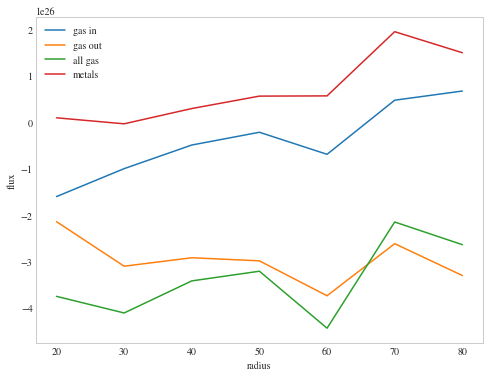

In [86]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(data['radius']*100000, data['mass_flux_in'],label="gas in")
ax.plot(data['radius']*100000, data['mass_flux_out'],label="gas out")
ax.plot(data['radius']*100000, data['net_mass_flux'],label="all gas")
ax.plot(data['radius']*100000, 500*data['net_metal_flux'],label="metals")
lg = ax.legend()
plt.xlabel('radius')
plt.ylabel('flux')

In [68]:
big_sphere = ds.sphere(halo_center, 0.45*refine_width_code)
print(big_sphere.center)
print(halo_center)
print(big_sphere.get_field_parameter('center'))

[0.49403286 0.48895168 0.50215435] code_length
[0.4940328598022461, 0.4889516830444336, 0.5021543502807617]
[0.49403286 0.48895168 0.50215435] code_length


Text(0,0.5,u'flux')

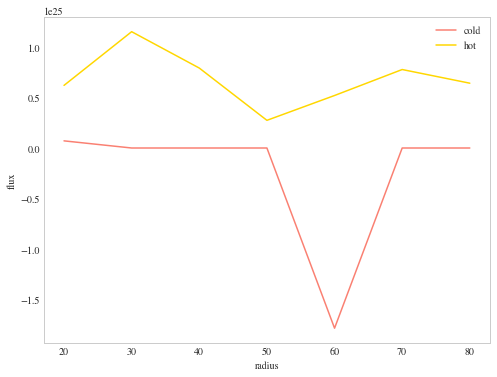

In [82]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(data['radius']*100000, data['net_cold_mass_flux'],label="cold",color="salmon")
#ax.plot(data['radius']*100000, data['net_cool_mass_flux'],label="cool",color="purple")
#ax.plot(data['radius']*100000, data['net_warm_mass_flux'],label="warm",color="green")
ax.plot(data['radius']*100000, data['net_hot_mass_flux'],label="hot",color="gold")
lg = ax.legend()
plt.xlabel('radius')
plt.ylabel('flux')

In [89]:
new_data = Table(names=('redshift', 'radius', 'nref_mode', \
                        'net_mass_flux', 'net_metal_flux', \
                        'annular_ang_mom_gas_x', 'annular_ang_mom_gas_y','annular_ang_mom_gas_z', \
                        'annular_spec_ang_mom_gas_x', 'annular_spec_ang_mom_gas_y','annular_spec_ang_mom_gas_z',\
                        'annular_ang_mom_dm_x', 'annular_ang_mom_dm_y','annular_ang_mom_dm_z', \
                        'annular_spec_ang_mom_dm_x', 'annular_spec_ang_mom_dm_y', 'annular_spec_ang_mom_dm_z', \
                        'outside_ang_mom_gas_x', 'outside_ang_mom_gas_y', 'outside_ang_mom_gas_z',  \
                        'outside_spec_ang_mom_gas_x', 'outside_spec_ang_mom_gas_y', 'outside_spec_ang_mom_gas_z', \
                        'outside_ang_mom_dm_x', 'outside_ang_mom_dm_y','outside_ang_mom_dm_z',\
                        'outside_spec_ang_mom_dm_x', 'outside_spec_ang_mom_dm_y', 'outside_spec_ang_mom_dm_z', \
                        'inside_ang_mom_stars_x', 'inside_ang_mom_stars_y', 'inside_ang_mom_stars_z', \
                        'inside_spec_ang_mom_stars_x', 'inside_spec_ang_mom_stars_y', 'inside_spec_ang_mom_stars_z'),
                  dtype=('f8', 'f8', 'i8', 'f8', 'f8',
                         'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
                         'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
                         'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
                         'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
                         'f8', 'f8', 'f8', 'f8', 'f8', 'f8'
                        ))
